<a href="https://colab.research.google.com/github/Blurr99/tensorflow_deepLearning/blob/main/10_time_series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series forecasting

## Get Data

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2024-07-01 06:13:40--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.003s  

2024-07-01 06:13:41 (49.1 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing data

In [2]:
import pandas as pd
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col = ['Date'])

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
len(df)

2787

In [5]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns = {"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


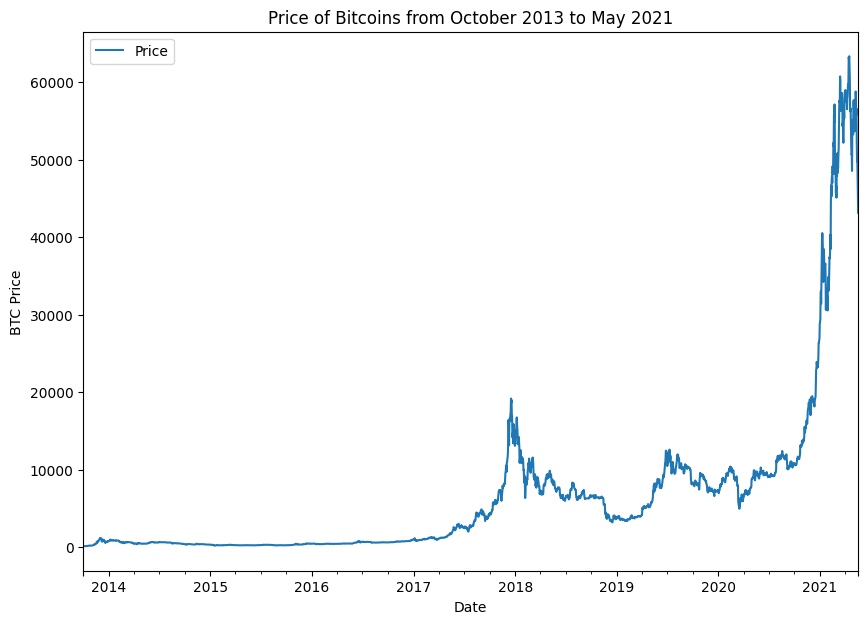

In [6]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize = (10,7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoins from October 2013 to May 2021");

## Importing the csv file using the csv module

In [7]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
    btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

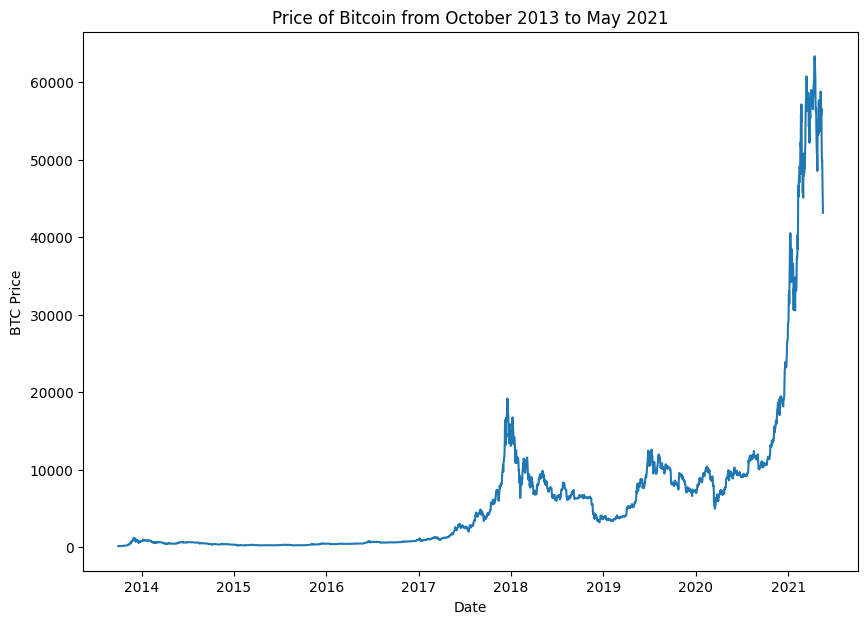

In [8]:
# Plot from csv
plt.figure(figsize = (10,7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.xlabel("Date")
plt.title("Price of Bitcoin from October 2013 to May 2021");

## Format Data part 1: Create train and test sets of the data

### Creating train and test sets the wrong way

In [9]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [10]:
# Wrong way to make train and test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, prices,
                                                    test_size = 0.2,
                                                    random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

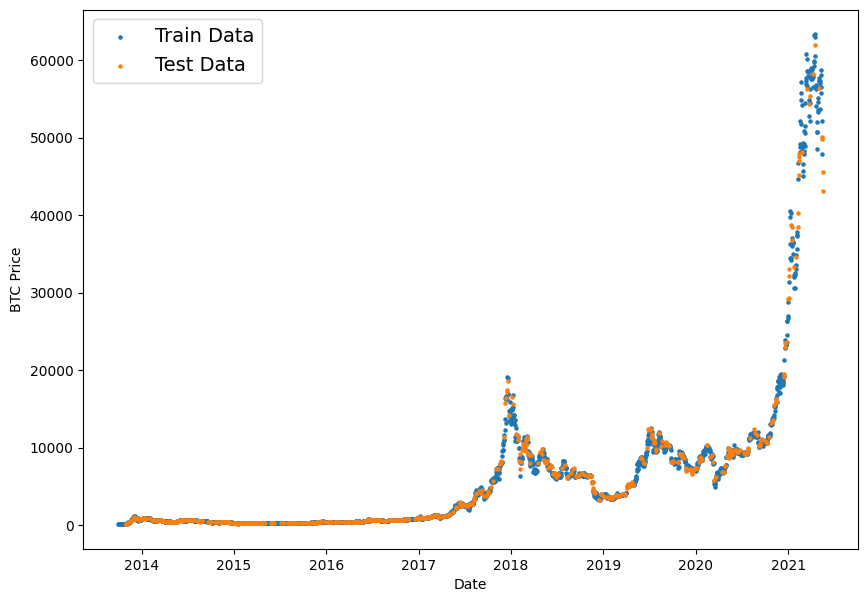

In [11]:
# Plotting the wrong train and test splits
plt.figure(figsize = (10,7))
plt.scatter(X_train, y_train, s = 5, label = "Train Data")
plt.scatter(X_test, y_test, s=5, label = "Test Data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize = 14)
plt.show();

### Create train and test sets the right way

In [12]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

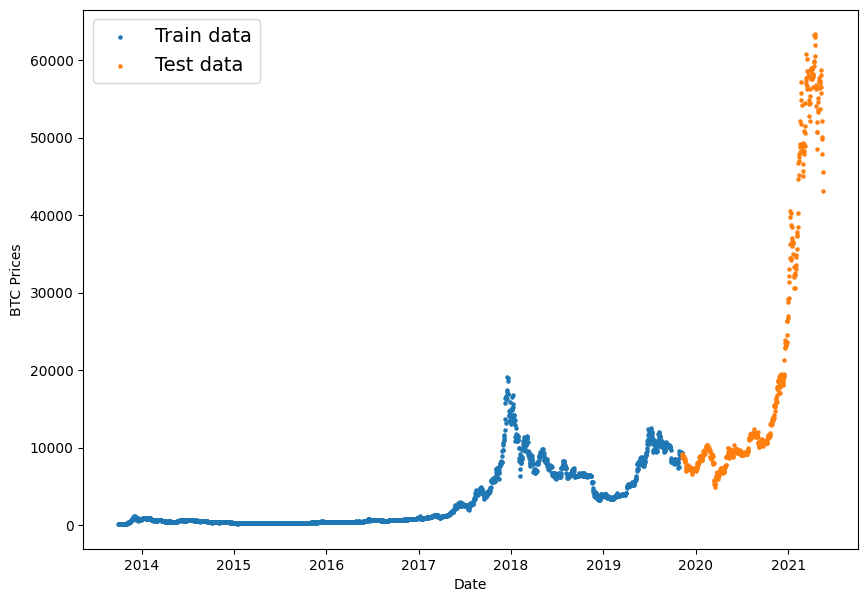

In [13]:
# Plotting the right splits
plt.figure(figsize = (10,7))
plt.scatter(X_train, y_train, s=5, label = "Train data")
plt.scatter(X_test, y_test, s=5, label = "Test data")
plt.xlabel("Date")
plt.ylabel("BTC Prices")
plt.legend(fontsize = 14)
plt.show();

## Create a plotting function

In [14]:
def plot_time_series(timesteps, values, format = ".", start=0, end=None, label=None):
  """
    Plots timeseries (a series of points in time) against values (a series of values across timesteps).

    Parameters
    ----------
    timesteps: array of timestep values
    values: array of values across time
    format: style of plot (default: ".")
    start: where to start the plot (setting a value will index from start of timesteps & values)
    end: where to end the plot
    label: label to show on plot about values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label = label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize = 14)
  plt.grid(True)

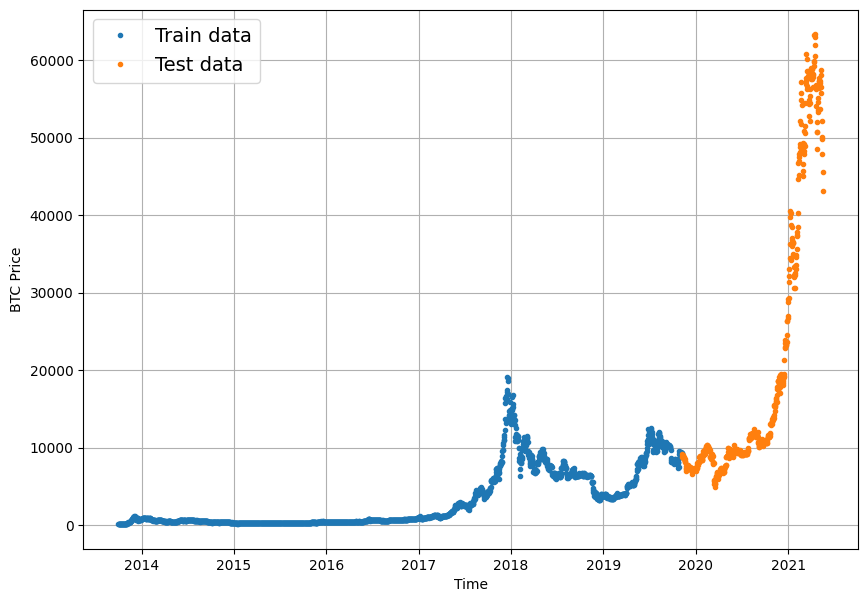

In [15]:
# Testing out the plotting function
plt.figure(figsize = (10,7))
plot_time_series(timesteps = X_train, values = y_train, label = "Train data")
plot_time_series(timesteps = X_test, values = y_test, label = "Test data")

## Modelling Experiments

TERMS:
* **HORIZON** : number of timesteps into the future thats going to be predicted.
* **WINDOW SIZE** : number of timesteps to be used to predict the `HORIZON`.

Modelling experiments to run:
* 0 Naive Model (baseline)
* 1 Dense Model, HORIZON = 1, WINDOW = 7
* 2 Same as 1, HORIZON = 1, WINDOW = 30
* 3 Same as 1, HORIZON = 7, WINDOW = 30
* 4 Conv1D, HORIZON = 1, WINDOW = 7
* 5 LSTM, HORIZON = 1, WINDOW = 7
* 6 Same as 1 (but with multivariate data), HORIZON = 1, WINDOW = 7
* 7 N_BEATS Algorithm, HORIZON = 1, WINDOW = 7
* 8 Ensemble (multiple models optimized on different loss functions), HORIZON = 1, WINDOW = 7
* 9 Future prediction model (model to predict future values), HORIZON = 1, WINDOW = 7
* 10 Same as 1 (but with turkey data introduced), HORIZON = 1, WINDOW = 7

## Model 0: Naive Forecast (baseline)

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

In English:
> The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this if for a `HORIZON` of 1.

In [16]:
# Create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

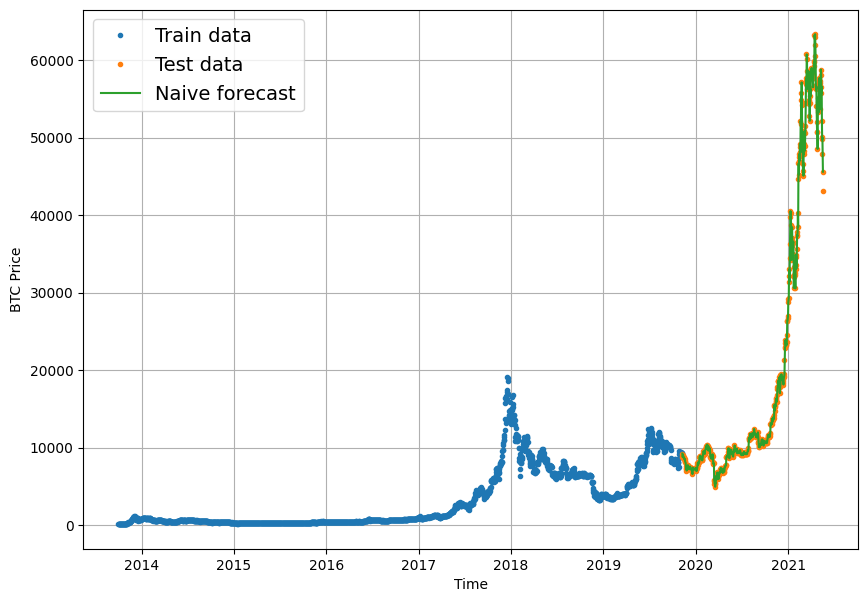

In [17]:
# Plotting
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

## Metrics for evaluating a time series forecasting model

Time series forecasting models use the some of the same metrics as regression models, plus many more.
Some of those metrics include but not limited to:

* MAE - Mean Absolute Error
* MSE - Mean Squared Error
* RMSE - Root Mean Squared Error
* MAPE/sMAPE - (Symmetric) Mean Absolute Percentage Error
* MASE - Mean Absolute Scaled Error

For all of the above metrics, **lower is better**, for ex: an MAE of 0 is better than an MAE of 100

In [18]:
import tensorflow as tf

In [19]:
# Implementing MASE
def mean_absolute_scaled_error(y_true, y_pred):
  """
    Implementation of MASE using tensorflow (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae / mae_naive_no_season

In [20]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred = naive_forecast).numpy()

0.9995699939182624

In [21]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [22]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred = naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Formatting Data Part 2: Windowing the dataset

```Windowing for a week:
 [1,2,3,4,5,6] -> [7]
 [2,3,4,5,6,7] -> [8]
 [3,4,5,6,7,8] -> [9]
 ```

In [23]:
print(f"Using {btc_price[:7]} to predict {btc_price[7]}")

Using [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict 123.033


In [24]:
# Setting up global variables
HORIZON = 1
WINDOW_SIZE = 7

In [25]:
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [26]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


Theres a way to label the windowed data. However, this only works in small scale. Theres a need of a function that automates this process.

This can be done using Python for loops but for large datasets, it might take too long. Therefore, Numpy indexing might be a better option.

The function needs to:
1. Create a window step of a specific window size (e.g. [0, 1, 2, 3, 4, 5, 6].
2. Use Numpy indexing to create a 2D array of multiple window steps, for example:
```
[[0, 1, 2, 3, 4, 5, 6],
 [1, 2, 3, 4, 5, 6, 7],
 [2, 3, 4, 5, 6, 7, 8]]
```
3. Uses the 2D array of multiple window steps (from 2.) to index on target series (the historical price of BitCoin).
4. Uses the `get_labelled_windows()` function to turn window steps into windows with a specific horizon.

In [27]:
import numpy as np

In [28]:
# Creating the function
def make_windows(x, window_size = WINDOW_SIZE, horizon = HORIZON):
  """
    Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # 1. Create a window of specific window size
  window_step = np.expand_dims(np.arange(window_size + horizon), axis = 0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis = 0).T

  # print(f"Window indexes: \n {window_indexes, window_indexes.shape}")

  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  # print(windowed_array)

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon = horizon)
  # print(f"Windows: \n {windows} \n Labels: {labels}")
  return windows, labels

In [29]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
print(len(full_windows), len(full_labels))

2780 2780


In [30]:
# Checking the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Labels: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Labels: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Labels: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Labels: [125.96116]


In [31]:
# Checking the firlastst 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Labels: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Labels: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Labels: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Labels: [43144.47129086]


In [32]:
prices[-1]

43144.4712908603

# Turning windows into train and test sets

In [33]:
# Function to create train/test splits
def make_train_test_splits(windows, labels, test_size = 0.2):
  """
    Splits matching pairs into train and test splits.
  """
  split_size = int(len(windows) * (1 - test_size))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [34]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [35]:
len(full_windows) * 0.8

2224.0

In [36]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [37]:
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

In [38]:
# Check to see if train labels are the same (before and after split)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Making a modelling checkpoint callback

Because the model's performance will fluctuate from experiment to experiment, a model checkpoint helps compare apples to apples.

More speicifically, each model's best performances need to be compared to the other model's best performances.

In [200]:
from re import VERBOSE
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path = "model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                            verbose = 0,
                                            save_best_only = True)

## Model 1: Dense Model (window = 7, horizon = 1)
The first deep learning model is going to have:
* A single dense layer with 128 hidden units.
* An output layer with linear activation (no activation)
* Adam optimizer with MAE loss function.
* Batch size of 128.
* 100 epochs


In [40]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

# 1. Construct model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(1, activation = "linear")
], name = "model_1_dense")

# 2. Compile
model_1.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])

# 3. Fit the model
model_1.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_1.name)])

Epoch 1/100
18/18 [==============================] - 3s 58ms/step - loss: 712.9379 - mae: 712.9379 - mse: 1988367.6250 - val_loss: 1788.2106 - val_mae: 1788.2106 - val_mse: 9105756.0000
Epoch 2/100
18/18 [==============================] - 0s 26ms/step - loss: 259.6133 - mae: 259.6133 - mse: 318479.7188 - val_loss: 1286.6083 - val_mae: 1286.6083 - val_mse: 5262825.0000
Epoch 3/100
18/18 [==============================] - 0s 25ms/step - loss: 214.5147 - mae: 214.5147 - mse: 227059.1719 - val_loss: 1098.7880 - val_mae: 1098.7880 - val_mse: 4000334.2500
Epoch 4/100
18/18 [==============================] - 0s 26ms/step - loss: 196.5923 - mae: 196.5923 - mse: 199639.9062 - val_loss: 1031.0386 - val_mae: 1031.0386 - val_mse: 3493077.0000
Epoch 5/100
18/18 [==============================] - 0s 24ms/step - loss: 187.9570 - mae: 187.9570 - mse: 185635.3594 - val_loss: 993.8604 - val_mae: 993.8604 - val_mse: 3205005.0000
Epoch 6/100
18/18 [==============================] - 0s 24ms/step - loss: 17

In [41]:
# Evaluating model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 601.2142 - mae: 601.2142 - mse: 1219552.3750


[601.2142333984375, 601.2142333984375, 1219552.375]

In [42]:
# Load in the saved best performing model and evaluate it on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 566.9826 - mae: 566.9826 - mse: 1153944.7500


[566.9826049804688, 566.9826049804688, 1153944.75]

## Making forecasts with a model (on the test dataset)
Writing a function to make "forecasts" on the test dataset, which has to:
1. Take in a model.
2. Takes in some input data(same kind of data that the model was trained on).
3. Passes the input data to the model's `predict()` method
4. Returns the predictions.

In [43]:
def make_preds(model, input_data):
  """
    Uses model to make predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [44]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model = model_1, input_data = test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8821.721, 8776.984, 9052.013, 8749.914, 8732.673, 8729.104,
        8681.643, 8500.297, 8454.527, 8531.538], dtype=float32)>)

In [45]:
test_labels.shape, model_1_preds.shape, tf.squeeze(test_labels).shape

((556, 1), TensorShape([556]), TensorShape([556]))

In [46]:
# Evaluate preds
model_1_results = evaluate_preds(y_true = tf.squeeze(test_labels), y_pred = model_1_preds)
model_1_results

{'mae': 566.9826,
 'mse': 1153944.9,
 'rmse': 1074.2183,
 'mape': 2.5488536,
 'mase': 0.9960314}

In [47]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

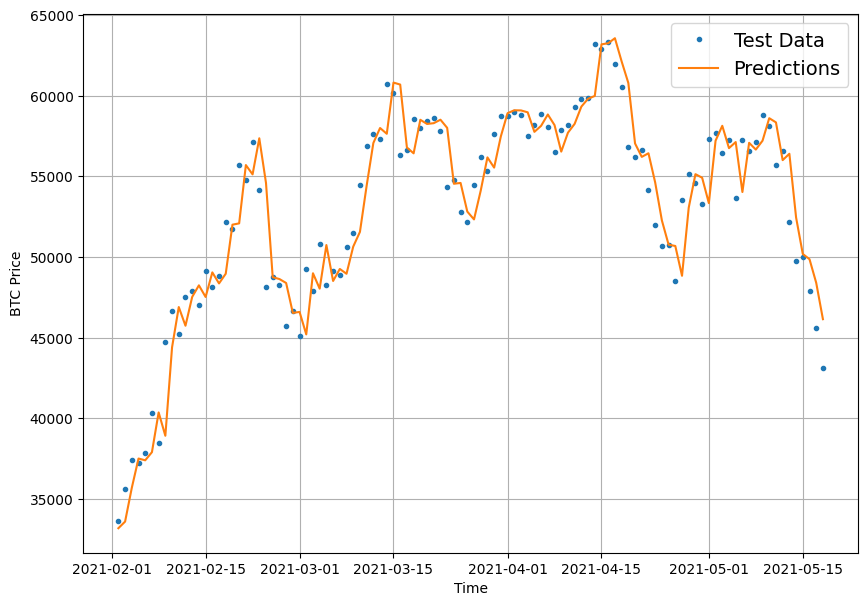

In [48]:
# Plotting the model 1 predictions
offset = 450
plt.figure(figsize = (10,7))
plot_time_series(timesteps = X_test[-len(test_windows):], values = test_labels[:, 0], start = offset, label = "Test Data")
plot_time_series(timesteps = X_test[-len(test_windows):], values = model_1_preds, format = "-", start = offset, label = "Predictions")

## Model 2: Dense (window = 30, horizon = 1)

In [49]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [50]:
# Make train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [51]:
train_windows[:3], train_labels[:3]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [52]:
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON, activation = "linear")
], name = "model_2_dense")

# Compile model
model_2.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae" ,"mse"])

# Fit the model
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [53]:
# Evaluate model_2 on test data
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 618.8637 - mae: 618.8637 - mse: 1321373.0000


[618.8637084960938, 618.8637084960938, 1321373.0]

In [54]:
# Loading in the best model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 616.8881 - mae: 616.8881 - mse: 1313642.8750


[616.8881225585938, 616.8881225585938, 1313642.875]

In [55]:
# Get forecast predictions
model_2_preds = make_preds(model_2, input_data = test_windows)
model_2_preds[:5]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8848.534, 8790.344, 8840.131, 8518.257, 8385.359], dtype=float32)>

In [56]:
model_2_results = evaluate_preds(y_true = tf.squeeze(test_labels), y_pred = model_2_preds)
model_2_results

{'mae': 616.8881,
 'mse': 1313642.9,
 'rmse': 1146.1426,
 'mape': 2.7584796,
 'mase': 1.0783265}

In [57]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

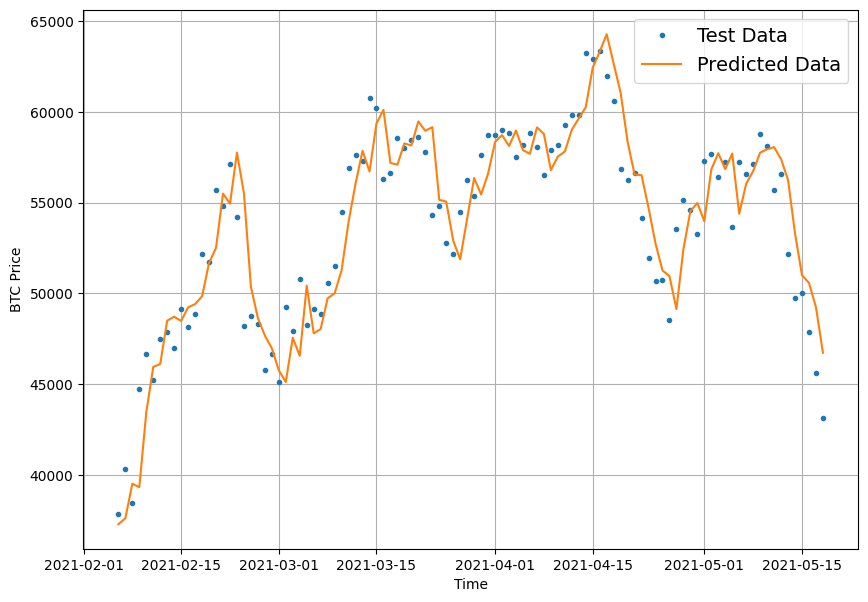

In [58]:
OFFSET = 450
plt.figure(figsize = (10,7))
plot_time_series(timesteps = X_test[-len(test_windows):], values = test_labels[:,0], start = OFFSET, label = "Test Data")
plot_time_series(timesteps = X_test[-len(test_windows):], values = model_2_preds, format = "-", start = OFFSET, label = "Predicted Data")

In [59]:
WINDOW_SIZE = 30
HORIZON = 7
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [60]:
full_windows[:3], full_labels[:3]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [61]:
# Splitting the data into train and test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels, 0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [62]:
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON, activation = "linear")
], name = "model_3_dense")

# Compile the model
model_3.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])

# Fit the model
model_3.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            batch_size = 128,
            verbose = 0,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name=model_3.name)])

In [63]:
# Evaluating model 3
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 1394.8079 - mae: 1394.8079 - mse: 5950391.5000


[1394.807861328125, 1394.807861328125, 5950391.5]

In [64]:
# Loading model 3with the best performing weights
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 6ms/step - loss: 1237.3516 - mae: 1237.3516 - mse: 5340579.5000


[1237.3515625, 1237.3515625, 5340579.5]

In [65]:
# Making predictions with model 3
model_3_preds = make_preds(model_3, test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9352.284 , 9348.804 , 9328.61  , 9293.894 , 9258.16  , 9381.838 ,
        9392.477 ],
       [9129.774 , 9118.73  , 8963.692 , 9146.539 , 9031.67  , 9310.683 ,
        9290.775 ],
       [8951.538 , 8838.385 , 8976.044 , 9020.562 , 9138.813 , 9290.548 ,
        9157.255 ],
       [8965.937 , 9138.283 , 9243.6045, 9203.486 , 9444.832 , 9401.669 ,
        9222.669 ],
       [8872.862 , 9142.697 , 9142.459 , 9081.96  , 9317.693 , 9261.709 ,
        9138.698 ]], dtype=float32)>

In [66]:
model_3_results = evaluate_preds(test_labels, model_3_preds)
model_3_results

{'mae': array([ 543.3659  ,  390.43918 ,  386.0618  ,  604.90265 ,  582.5206  ,
         490.2601  ,  426.63547 ,  453.38568 ,  574.7664  ,  705.5212  ,
         865.022   ,  757.81946 ,  806.98926 ,  852.7026  ,  667.10675 ,
         386.92075 ,  237.08    ,  182.21742 ,  198.93053 ,  237.92752 ,
         194.59285 ,  168.26158 ,  246.40604 ,  286.12283 ,  207.4414  ,
         159.1605  ,  147.82896 ,  178.61223 ,  172.10693 ,  150.10156 ,
         274.55133 ,  352.38547 ,  339.86713 ,  315.7064  ,  283.73276 ,
         275.61957 ,  292.13666 ,  235.14822 ,  229.65604 ,  255.6942  ,
         422.1271  ,  111.689316,   80.368095,   98.08866 ,   76.076454,
          54.26911 ,   38.59675 ,   84.59968 ,  125.05915 ,  143.5466  ,
         136.14809 ,  173.45305 ,  185.32967 ,  180.78635 ,  227.97377 ,
         343.04688 ,  480.3914  ,  445.25336 ,  482.99533 ,  564.39514 ,
         420.1353  ,  245.05385 ,  240.71059 ,  321.05923 ,  380.24554 ,
         473.3879  ,  395.36285 ,  452.48773

#### Every metric has multiple values as the model predicts 7 values for the next 7 days but the evaluate function doesn't take that into account.

## Making the evaluation function work for higher horizons

In [67]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [68]:
# Get model 3 results aggregating to a single value
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels), y_pred = model_3_preds)
model_3_results

{'mae': 1237.3514,
 'mse': 5340579.0,
 'rmse': 1417.1051,
 'mape': 5.5508523,
 'mase': 2.2017977}

## Visualizing the results yielded by model 3

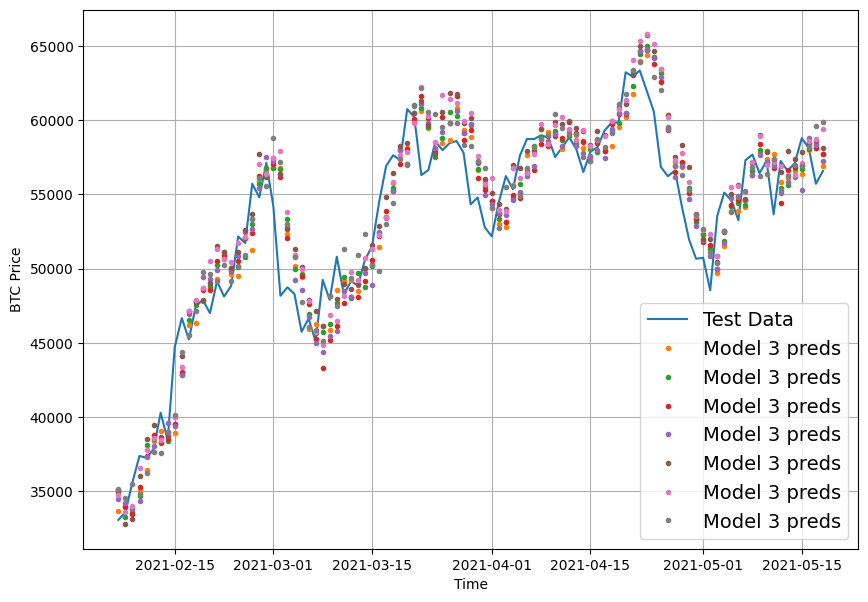

In [69]:
OFFEST = 300
plt.figure(figsize = (10,7))
plot_time_series(timesteps = X_test[-len(test_windows):], values = test_labels[:,0], format = "-", start = OFFSET, label = "Test Data")
plot_time_series(timesteps = X_test[-len(test_windows):], values = model_3_preds, start = OFFSET, label = "Model 3 preds")

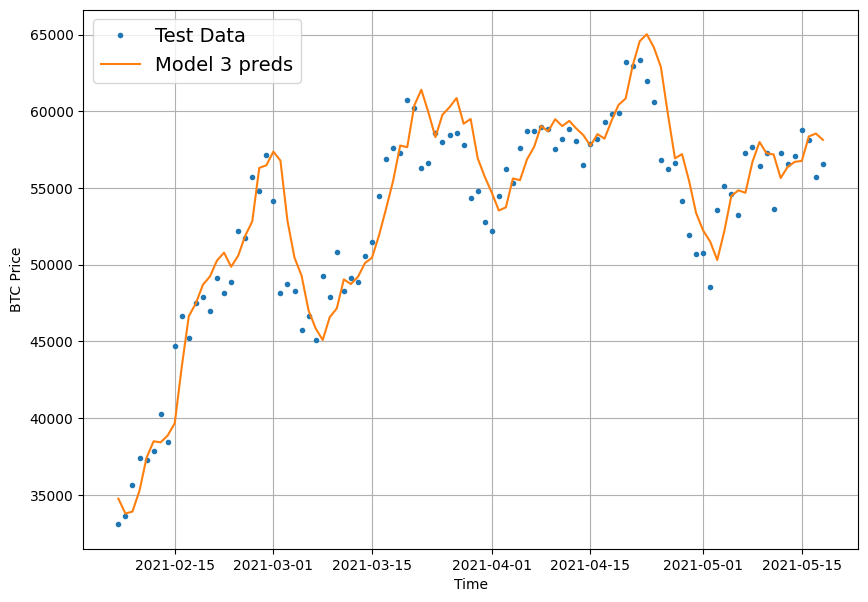

In [70]:
OFFEST = 300
plt.figure(figsize = (10,7))
plot_time_series(timesteps = X_test[-len(test_windows):], values = test_labels[:,0], start = OFFSET, label = "Test Data")
plot_time_series(timesteps = X_test[-len(test_windows):], values = tf.reduce_mean(model_3_preds, axis = 1),
                 start = OFFSET,
                 format = "-",
                 label = "Model 3 preds")

## Checking which model is performing the best

<Axes: >

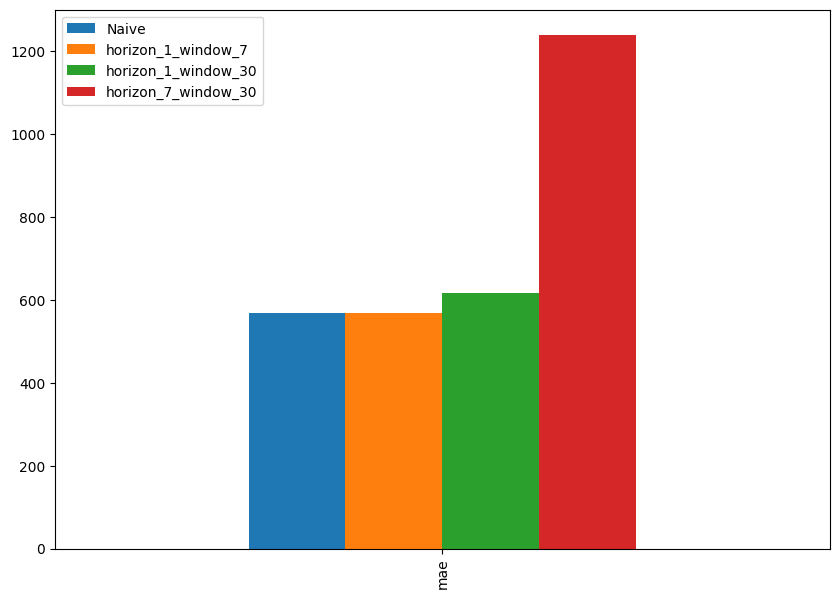

In [71]:
pd.DataFrame({"Naive" : naive_results["mae"],
              "horizon_1_window_7" : model_1_results["mae"],
              "horizon_1_window_30" : model_2_results["mae"],
              "horizon_7_window_30" : model_3_results["mae"]}, index = ["mae"]).plot(figsize = (10,7), kind = "bar")

## Model 4: Conv 1D

In [72]:
HORIZON = 1
WINDOW_SIZE = 7

In [73]:
# Create windowed data
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [74]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

The input for Conv1D requires the shape of: `(batch_size, timesteps, input_dim)`...

However, this data isnt in this form yet

In [75]:
train_windows[0].shape

(7,)

In [76]:
# Before passing the data into the Conv1D layer, it is required to reshape it to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [77]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))

In [78]:
# Testing out the lambda layer
print(f"Original shape: {x.shape}")
print(f"Expanded shape: {expand_dims_layer(x).shape}")
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [79]:
len(train_windows), len(train_labels)

(2224, 2224)

In [80]:
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
    layers.Conv1D(filters = 128, kernel_size = 5, strides = 1, padding = "causal", activation = "relu"),
    layers.Dense(HORIZON)
], name = "model_4_Conv1D")

# Compile the model
model_4.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])

# Fit the model
model_4.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            batch_size = 128,
            verbose = 0,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name=model_4.name)])

In [81]:
model_4.summary()

Model: "model_4_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
# Evaluating the model
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 623.9025 - mae: 623.9025 - mse: 1289088.7500


[623.9025268554688, 623.9025268554688, 1289088.75]

In [83]:
# Loading in the best performing model 4
model_4 = tf.keras.models.load_model("/content/model_experiments/model_4_Conv1D/")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 576.5911 - mae: 576.5911 - mse: 1206758.6250


[576.5911254882812, 576.5911254882812, 1206758.625]

In [84]:
# Making predictions with model 4
model_4_preds = make_preds(model_4, input_data = test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8931.75  , 8801.773 , 9015.117 , 8820.973 , 8750.693 , 8772.353 ,
       8707.7705, 8546.144 , 8492.784 , 8533.735 ], dtype=float32)>

In [85]:
# Evaluate the predictions
model_4_results = evaluate_preds(y_true = tf.squeeze(test_labels), y_pred = model_4_preds)
model_4_results

{'mae': 576.5911,
 'mse': 1206758.6,
 'rmse': 1098.5256,
 'mape': 2.5838337,
 'mase': 1.012911}

## Model 5: RNN (LSTM)

In [86]:
tf.random.set_seed(42)

# Create the model
inputs = layers.Input(shape = (WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))(inputs)
# x = layers.LSTM(128, return_sequences = True)(x)
x = layers.LSTM(128, activation = "relu")(x)
# x = layers.Dense(32, activation = "relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs, output, name = "model_5_LSTM")

# Compile
model_5.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam())

# Fit the model
model_5.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_5.name)])

Epoch 1/100
18/18 [==============================] - 5s 130ms/step - loss: 3017.7490 - val_loss: 14265.5059
Epoch 2/100
18/18 [==============================] - 1s 82ms/step - loss: 1455.1171 - val_loss: 3695.8740
Epoch 3/100
18/18 [==============================] - 1s 79ms/step - loss: 324.8264 - val_loss: 1316.8929
Epoch 4/100
18/18 [==============================] - 1s 83ms/step - loss: 216.8131 - val_loss: 1074.2682
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 193.2032 - val_loss: 1119.3778
Epoch 6/100
18/18 [==============================] - 1s 83ms/step - loss: 185.9840 - val_loss: 1036.1042
Epoch 7/100
18/18 [==============================] - 0s 6ms/step - loss: 182.7455 - val_loss: 1055.8368
Epoch 8/100
18/18 [==============================] - 0s 7ms/step - loss: 183.4501 - val_loss: 1055.6812
Epoch 9/100
18/18 [==============================] - 0s 7ms/step - loss: 181.5784 - val_loss: 1043.9863
Epoch 10/100
18/18 [==============================] - 1

In [87]:
# Evaluating the model
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 592.3537


592.3536987304688

In [88]:
# Loading in the best performing model
model_5 = tf.keras.models.load_model("/content/model_experiments/model_5_LSTM")

In [89]:
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 592.3537


592.3536987304688

In [90]:
# Making predictions
model_5_preds = make_preds(model_5, input_data = test_windows)
model_5_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8956.045, 8816.326, 8956.631, 8801.462, 8760.509], dtype=float32)>

In [91]:
# Evaluating the preds
model_5_results = evaluate_preds(y_true = tf.squeeze(test_labels), y_pred = model_5_preds)
model_5_results

{'mae': 592.3537,
 'mse': 1254198.8,
 'rmse': 1119.9102,
 'mape': 2.662092,
 'mase': 1.0406014}

> Note: Just because neural networks are powerful algorithms, doesn't mean they can be used for any problem

## Making a multivaiate time series dataset

Adding the bitcoin halving events as a feature to the dataset as the price of bitcoin seems to increase right after the halving date.

In [92]:
block_reward_1 = 50 # 3 January 2009
block_reward_2 = 25 # 8 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 1010

# Block rewards dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [93]:
block_reward_2_datetime

numpy.datetime64('2012-11-28')

In [94]:
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [95]:
# Add in a block reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Add in block_reward values as a feature
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [96]:
bitcoin_prices_block["block_reward"].value_counts()

block_reward
12.5    1409
25      1012
6.25     366
Name: count, dtype: int64

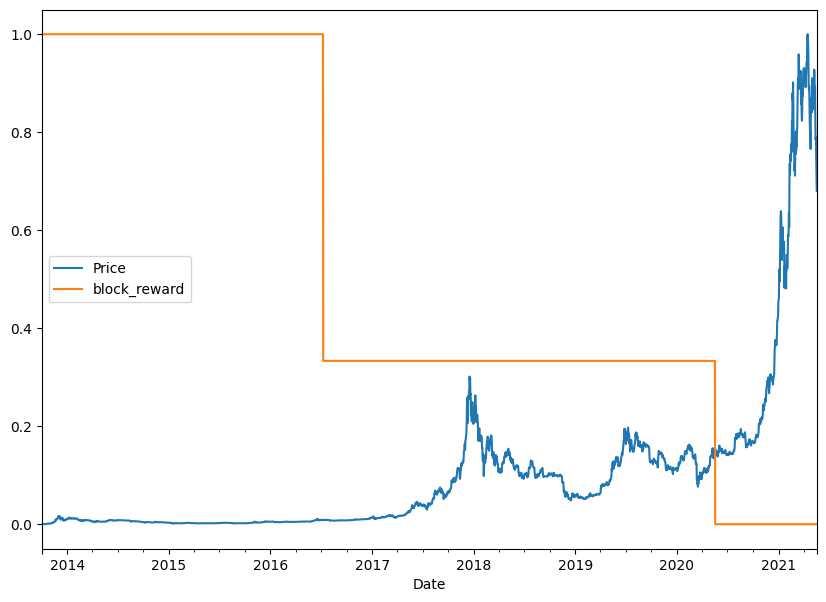

In [97]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                     columns = bitcoin_prices_block.columns,
                                     index = bitcoin_prices_block.index)

scaled_price_block_df.plot(figsize = (10,7));

## Making a windowed dataset with pandas

Previously, univariate time series was being turned into windowed dataset using the helper functions. However, with multivariate data, these functions won't work.

`Pandas.DataFrame.shift()` method can be used to window the multivariate data.

In [98]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [99]:
# Make a copy of the bitcoinb historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)

bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


This way, theres a way to directly window the dataset from a Pandas DataFrame.
```
[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]
[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]
```

In [100]:
# Create X (windows) and y (horizons) features
X = bitcoin_prices_windowed.dropna().drop("Price", axis = 1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [101]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [102]:
# Make train and test splits using indexing
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

## Model 6: Dense model but with multivariate data

In [103]:
tf.random.set_seed(42)

# Creating a model
model_6 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON)
], name = "model_6_dense_multivariate")

# Compiling the model
model_6.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])

# Fitting the model
model_6.fit(x = X_train,
            y = y_train,
            epochs = 100,
            batch_size = 128,
            verbose = 1,
            validation_data = (X_test, y_test),
            callbacks = [create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
18/18 [==============================] - 1s 32ms/step - loss: 1179.7089 - mae: 1179.7089 - mse: 5142263.5000 - val_loss: 2908.2427 - val_mae: 2908.2427 - val_mse: 19272742.0000
Epoch 2/100
18/18 [==============================] - 0s 25ms/step - loss: 311.8783 - mae: 311.8783 - mse: 419733.1250 - val_loss: 1130.7804 - val_mae: 1130.7804 - val_mse: 3879092.5000
Epoch 3/100
18/18 [==============================] - 0s 24ms/step - loss: 197.9598 - mae: 197.9598 - mse: 191128.4219 - val_loss: 1038.3671 - val_mae: 1038.3671 - val_mse: 3443833.7500
Epoch 4/100
18/18 [==============================] - 1s 31ms/step - loss: 185.3822 - mae: 185.3822 - mse: 179367.3594 - val_loss: 971.3124 - val_mae: 971.3124 - val_mse: 3172218.5000
Epoch 5/100
18/18 [==============================] - 1s 35ms/step - loss: 173.9051 - mae: 173.9051 - mse: 162377.9844 - val_loss: 966.0374 - val_mae: 966.0374 - val_mse: 3022898.7500
Epoch 6/100
18/18 [==============================] - 1s 37ms/step - loss: 1

In [104]:
# Evaluating the model
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 632.9855 - mae: 632.9855 - mse: 1290576.8750


[632.9854736328125, 632.9854736328125, 1290576.875]

In [105]:
# Loading in the best perorming model
model_6 = tf.keras.models.load_model("/content/model_experiments/model_6_dense_multivariate/")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 571.0110 - mae: 571.0110 - mse: 1176791.7500


[571.010986328125, 571.010986328125, 1176791.75]

In [106]:
# Making predictions with model 6
model_6_preds = make_preds(model_6, input_data = X_test)
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8881.855 , 8799.832 , 9041.371 , 8796.063 , 8774.6045, 8782.115 ,
       8669.721 , 8551.67  , 8489.751 , 8535.74  ], dtype=float32)>

In [107]:
# Evaluating the predictions
model_6_results = evaluate_preds(y_true = y_test, y_pred = model_6_preds)
model_6_results

{'mae': 571.011,
 'mse': 1176791.8,
 'rmse': 1084.8003,
 'mape': 2.56211,
 'mase': 1.0031081}

## Model 7: N-BEATS Algorithm
### Builing and testing the N-BEATS block layer

Since the N-Beats layer doesn't exist in tensorflow, creating a custom layer/model using subclassing:
https://www.tensorflow.org/guide/keras/making_new_layers_and_models_via_subclassing

In [108]:
# Create NBeatBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLu activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation = "relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation = "linear", name = "theta")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)

    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]

    return backcast, forecast

Testing this NBeatsBlock class using some dummy data.

In [109]:
# Setup dummy NBeatsBlock Layer to represent inputs and outputs
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size = WINDOW_SIZE,
                                       theta_size = WINDOW_SIZE + HORIZON,
                                       horizon = HORIZON,
                                       n_neurons = 128,
                                       n_layers = 4)

In [110]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis = 0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [111]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)

# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.62973833  0.7863343  -0.55420226 -0.11648877 -0.41137245  0.6480003
 -0.9791615 ]
Forecast: 0.7782704830169678


### Preparing data for N-BEATS algorithm using tf.data

In [112]:
HORIZON = 1
WINDOW_SIZE = 7

In [113]:
# Create NBEATS data inputs (N-BEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [114]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods = i+1)

bitcoin_prices_nbeats.head(10)

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [115]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis = 1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [116]:
# Time to make the dataset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for N-BEATS algorithm

In [117]:
# Values from N-BEATS paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for residual connections

Before crafting the N-BEATS model, theres a requirement for 2 layers for residual connections (subtract and add).

The N-BEATS algorithm uses double residual stacking to help train its deeper architecture.

In [118]:
# Checking the subtract and add layers from tensorflow
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
add = layers.add([tensor_1, tensor_2])

# Get outputs
print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {add.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


### Building, Compiling and fitting the N-BEATS algorithm

In [119]:
%%time

tf.random.set_seed(42)

# 1. Setup an instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size = INPUT_SIZE,
                                 theta_size = THETA_SIZE,
                                 horizon = HORIZON,
                                 n_neurons = N_NEURONS,
                                 n_layers = N_LAYERS,
                                 name = "InitialBlock")

# 2. Create inputs to stack
stack_input = layers.Input(shape = (INPUT_SIZE), name = "stack_input")

# 3. Create initial backcast and forecast input (backcast prediction + forecast prediction)
residuals, forecast = nbeats_block_layer(stack_input)

# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)):

  # 5. Use the NBeatsBlock to calculate the backcast as well as forecast
  backcast, block_forecast = NBeatsBlock(input_size = INPUT_SIZE,
                                         theta_size = THETA_SIZE,
                                         horizon = HORIZON,
                                         n_neurons = N_NEURONS,
                                         n_layers = N_LAYERS,
                                         name = f"NBeatsBlock_{i}")(residuals) # pass in the residuals

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name = f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name = f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs = stack_input, outputs = forecast, name = "model_7_NBEATS")

# 8. Compile the model with MAE loss
model_7.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam())

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs = N_EPOCHS,
            validation_data = test_dataset,
            verbose = 0,
            callbacks = [tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                          patience = 200,
                                                          restore_best_weights = True),
                         tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss",
                                                              patience = 200,
                                                              verbose = 1)])


Epoch 1037: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
CPU times: user 4min 3s, sys: 5.72 s, total: 4min 9s
Wall time: 4min 45s


In [120]:
# Evaluating model 7
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 22ms/step - loss: 580.3170


580.3170166015625

In [121]:
# Making predictions using model 7
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8888.0625, 8788.866 , 9022.1455, 8807.251 , 8746.363 , 8733.912 ,
       8697.861 , 8523.361 , 8475.331 , 8523.293 ], dtype=float32)>

In [122]:
# Evaluating N-BEATS model preds
model_7_results = evaluate_preds(y_true = y_test,
                                 y_pred = model_7_preds)
model_7_results

{'mae': 580.317,
 'mse': 1202824.8,
 'rmse': 1096.7336,
 'mape': 2.6506789,
 'mase': 1.0194563}

In [123]:
model_1_results

{'mae': 566.9826,
 'mse': 1153944.9,
 'rmse': 1074.2183,
 'mape': 2.5488536,
 'mase': 0.9960314}

In [124]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

Even with all those special layers and hand-crafted network, the N-BEATS model doesn't perform as well as the `model_1` or the original naive forecast.

This goes to show that the power of smaller networks as well as the fact not all larger models are better suited for certain type of data.

### Plotting the N_BEATS model architecture

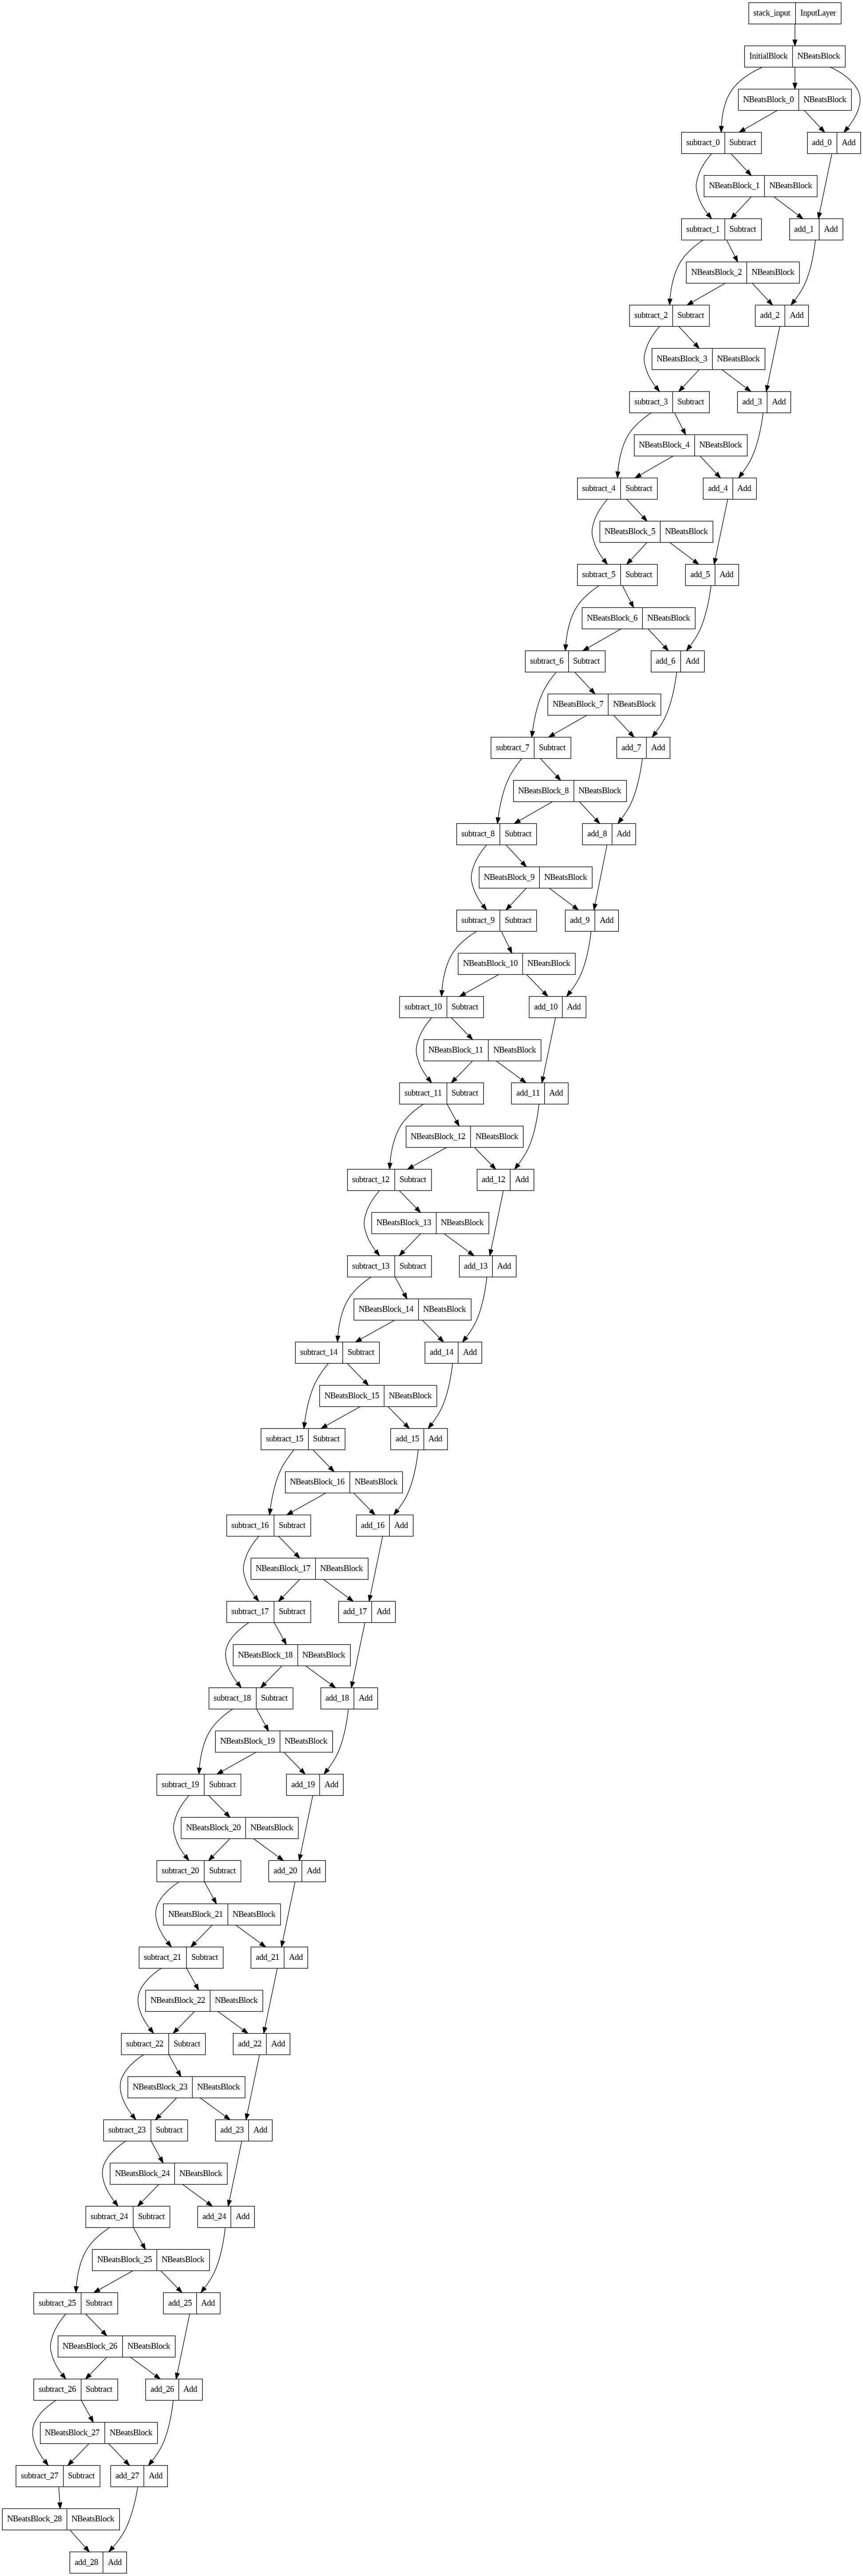

In [125]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: Creating an ensemble (stacking different models together)

In [126]:
HORIZON, WINDOW_SIZE

(1, 7)

### Constructing and fitting an ensemble of models (using different loss functions)

In [127]:
def get_ensemble_models(horizon = HORIZON,
                        train_data = train_dataset,
                        test_data = test_dataset,
                        num_iter = 10,
                        num_epochs = 1000,
                        loss_fns = ["mae", "mse", "mape"]):
  """
    Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

    For example, if num_iter = 10, a list of 30 trained models will be returned:
    10 * len(["mae", "mse", "mape"])
  """

  # Make an empty list
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model(similar to model_1)
      model = tf.keras.Sequential([
          # Initialize dense layers with normal distribution
          layers.Dense(128, kernel_initializer = "he_normal", activation = "relu"),
          layers.Dense(128, kernel_initializer = "he_normal",activation = "relu"),
          layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss = loss_function,
                    optimizer = tf.keras.optimizers.Adam(),
                    metrics = ["mae", "mse"])

      # Fit the current model
      model.fit(train_data,
                epochs = num_epochs,
                verbose = 0,
                validation_data = test_data,
                callbacks = [tf.keras.callbacks.EarlyStopping(monitor = "val_loss",
                                                              patience = 200,
                                                              restore_best_weights = True),
                             tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss",
                                                                  patience = 100,
                                                                  verbose = 1)])

      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models

In [128]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter = 5,
                                      num_epochs = 1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 275: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 375: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 108: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 220: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 320: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 796: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 965: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 1
Optimizing model by reducing: mape for 1000 epochs, model number: 1

Epoch 148: ReduceLROnPlateau reduci

In [129]:
len(ensemble_models)

15

In [130]:
ensemble_models

### Make predictions with the ensemble models

In [131]:
# Create a function that takes in a list of models to amek and return predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)

  return tf.constant(tf.squeeze(ensemble_preds))

In [132]:
# Create a list of ensemble predictions
%%time
ensemble_preds = make_ensemble_preds(ensemble_models, test_dataset)
ensemble_preds

1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 35ms/step
CPU times: user 635 ms, sys: 29.7 ms, total: 665 ms
Wall time: 815 ms


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8724.358,  8668.293,  9031.351, ..., 49503.15 , 49133.605,
        46174.05 ],
       [ 8759.1  ,  8799.722,  9096.18 , ..., 50319.945, 47636.848,
        45815.47 ],
       [ 8795.008,  8740.871,  9056.189, ..., 49812.984, 47985.652,
        45880.664],
       ...,
       [ 8792.391,  8776.063,  9068.723, ..., 50105.047, 48445.508,
        45647.793],
       [ 8788.268,  8804.128,  9046.955, ..., 49426.492, 48789.953,
        46759.883],
       [ 8819.363,  8803.766,  9052.698, ..., 50311.746, 48778.566,
        46254.91 ]], dtype=float32)>

In [133]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis = 0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8788.928, 8772.807, 9056.429, 8722.479, 8736.148, 8729.89 ,
       8650.846, 8482.421, 8455.999, 8520.401], dtype=float32)>

In [134]:
ensemble_median = np.median(ensemble_preds, axis = 0)
ensemble_median[:10]

array([8792.391, 8781.595, 9052.698, 8729.392, 8737.126, 8745.855,
       8648.279, 8480.499, 8463.577, 8520.773], dtype=float32)

In [135]:
# Evaluate ensemble preds
ensemble_results = evaluate_preds(y_true = y_test,
                                  y_pred = ensemble_preds)
ensemble_results

{'mae': 578.2521,
 'mse': 1174360.6,
 'rmse': 1083.5995,
 'mape': 2.625174,
 'mase': 1.0158286}

In [136]:
# Evaluate ensemble preds
ensemble_results = evaluate_preds(y_true = y_test,
                                  y_pred = ensemble_mean)
ensemble_results

{'mae': 568.29364,
 'mse': 1145354.2,
 'rmse': 1070.2123,
 'mape': 2.5652366,
 'mase': 0.9983345}

In [137]:
# Evaluate ensemble preds
ensemble_results = evaluate_preds(y_true = y_test,
                                  y_pred = ensemble_median)
ensemble_results

{'mae': 567.6399,
 'mse': 1146487.4,
 'rmse': 1070.7415,
 'mape': 2.5518985,
 'mase': 0.99718606}

### Plotting the prediction intervals (uncertainty estimates) of the ensemble

So far, the predictions have been point predictions.
E.g horizon = 1, the model predicts tomorrow's price of Bitcoin will be $50,000 USD.

But it would be more helpful, if the range was specified.
E.g. Instead of getting $50,000 , get $48,000 - $52,000.

One way to get the 95% confidence prediction intervals is the bootstrap method:
1. Take the predictions from a number of randomly initialized models.
2. Measure the standard deviation of the predictions.
3. Multiply the standard deviation by 1.96 (assuming the distribution is Gaussian/Normal, 95% of observations lie within 1.96 standard deviations of the mean).
4. To get the prediction intervals upper and lower bounds, add and subtract the value obtaibned in (3) to the mean/median of the predictions made in (1).

In [138]:
# Find upper and lower bounds OF ensemble predictions
def get_upper_lower(preds): # 1. Take in predictions as an input

  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis = 0)

  # 3. Multiply the standard deviation by 1.96
  interval = std * 1.96

  # 4. Get the interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis = 0)
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper

In [139]:
# Get the upper and lower bounds of the 95% prediction interval
lower, upper = get_upper_lower(preds = ensemble_preds)
lower[:5], upper[:5]

(<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8729.084, 8697.313, 9004.289, 8642.905, 8641.166], dtype=float32)>,
 <tf.Tensor: shape=(5,), dtype=float32, numpy=array([8848.771, 8848.3  , 9108.568, 8802.052, 8831.131], dtype=float32)>)

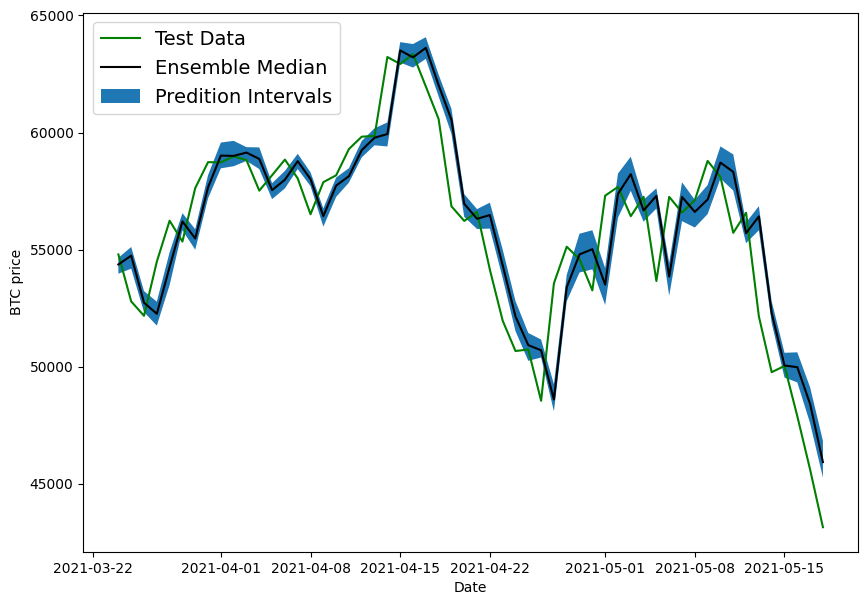

In [140]:
# Get the median/mean values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis = 0)

# Plot the median of our ensemble preds with the prediction intervals (where the predictions lie between)
offset = 500
plt.figure(figsize = (10,7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label = "Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label = "Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label = "Predition Intervals")
plt.legend(loc = "upper left", fontsize = 14);

So far, all of the models predictions have been lagging behind the test data.

As in they're replicating what the naive model does and just predict the previous timestep as the next timestep.

## Model 9: Train a model on full historical data to make predictions into the future.

So far, all of the models have been predicting on the test data, i.e. the pseudofuture

Now, building a model which is capable of predicting into the future.

In [143]:
# Train model on entire data to make predictions for the next day
x_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis = 1).to_numpy()
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

In [144]:
len(y_all), len(y_all)

(2780, 2780)

In [146]:
x_all[:5], y_all[:5]

(array([[121.795  , 120.65533, 121.33866, 118.67466, 108.58483, 125.455  ,
         123.65499],
        [123.033  , 121.795  , 120.65533, 121.33866, 118.67466, 108.58483,
         125.455  ],
        [124.049  , 123.033  , 121.795  , 120.65533, 121.33866, 118.67466,
         108.58483],
        [125.96116, 124.049  , 123.033  , 121.795  , 120.65533, 121.33866,
         118.67466],
        [125.27966, 125.96116, 124.049  , 123.033  , 121.795  , 120.65533,
         121.33866]]),
 array([123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ]))

In [148]:
# Turning data into efficient tensors
features_dataset = tf.data.Dataset.from_tensor_slices(x_all)
labels_dataset = tf.data.Dataset.from_tensor_slices(y_all)

dataset_all = tf.data.Dataset.zip((features_dataset, labels_dataset))

BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [151]:
tf.random.set_seed(42)

# Create a model
model_9 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON)
], name = "model_9_future_model")

# Compile the model
model_9.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam())

# Fit the model
model_9.fit(dataset_all,
            epochs = 100,
            verbose = 0)

### Making predictions into the future

In [152]:
# How many timesteps to predict into the future
INTO_FUTURE = 14

To make predictions into the future, the function needs to ⁉

1. Takes as input:
  * a list of values (Bitcoin historical data)
  * a trained model
  * a window into the future to predict
  * the window size a model was trained on
2. Creates an empty list for future forecasts which will be returned at the end, when its full of predictions and extracts the last `WINDOW_SIZE` from the input values.
3. Loop `INTO_FUTURE` times making a prediction on `WINDOW_SIZE` seqences which update to remove the first value and append the latest prediction.

In [155]:
# 1. Create function to make predictions into the future
def make_future_forecasts(values, model, into_future, window_size = WINDOW_SIZE):
  """
    Make future forecasts into_future steps after values ends.

    Returns future forecasts as a list of floats.
  """

  # 2. Create an empty list for future forecasts
  future_forecasts = []
  last_window = values[-WINDOW_SIZE:]

  # 3. Make into_future number of predictions, altering the data which gets predicted on each time
  for _ in range(into_future):
    # Predict on the last window then append it again, again, again (the model will eventually start to make forecast on its own forecast)
    future_pred = model.predict(tf.expand_dims(last_window, axis = 0))
    print(f"Prediction on \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future forecasts
    future_forecasts.append(tf.squeeze(future_pred).numpy())

    # Update last window with new pred and get WINDOW_SIZE most recent preds
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecasts

In [156]:
# Make forecasts into the future
future_forecasts = make_future_forecasts(values = y_all,
                                         model = model_9,
                                         into_future = INTO_FUTURE,
                                         window_size = WINDOW_SIZE)
future_forecasts

1/1 [==============================] - 0s 32ms/step
Prediction on 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 56046.671875

1/1 [==============================] - 0s 33ms/step
Prediction on 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 56046.671875  ] -> Prediction: 51203.484375

1/1 [==============================] - 0s 25ms/step
Prediction on 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 56046.671875   51203.484375  ] -> Prediction: 48938.421875

1/1 [==============================] - 0s 27ms/step
Prediction on 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 56046.671875   51203.484375   48938.421875  ] -> Prediction: 49762.921875

1/1 [==============================] - 0s 26ms/step
Prediction on 
 [47885.62525472 45604.61575361 43144.47129086 56046.671875
 51203.484375   48938.421875   49762.921875  ] -> Pre

[56046.67,
 51203.484,
 48938.42,
 49762.92,
 46864.1,
 46284.04,
 48413.375,
 54815.113,
 50139.32,
 48803.32,
 49218.34,
 46958.848,
 48228.6,
 51059.92]

### Plot future forecasts

In [165]:
def get_future_dates(start_date, into_future, offset = 1):
    """
      Returns array of datetimes starting from start_date to start_date + into_future
    """
    start_data = start_date + np.timedelta64(offset, "D") # Specify start_date and D starts for day
    end_date = start_date + np.timedelta64(into_future + 1, "D")

    return np.arange(start_date, end_date, dtype = "datetime64[D]")

In [175]:
# Last timestep of timesteps
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [178]:
# Get next 2 weeks of timesteps
next_time_steps = get_future_dates(start_date = last_timestep,
                                   into_future = INTO_FUTURE)
future_forecasts = future_forecasts[1:]
next_time_steps, future_forecasts

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 56046.67 , 51203.484, 48938.42 , 49762.92 , 46864.1  ,
        46284.04 , 48413.375, 54815.113, 50139.32 , 48803.32 , 49218.34 ,
        46958.848, 48228.6  , 51059.92 ], dtype=float32))

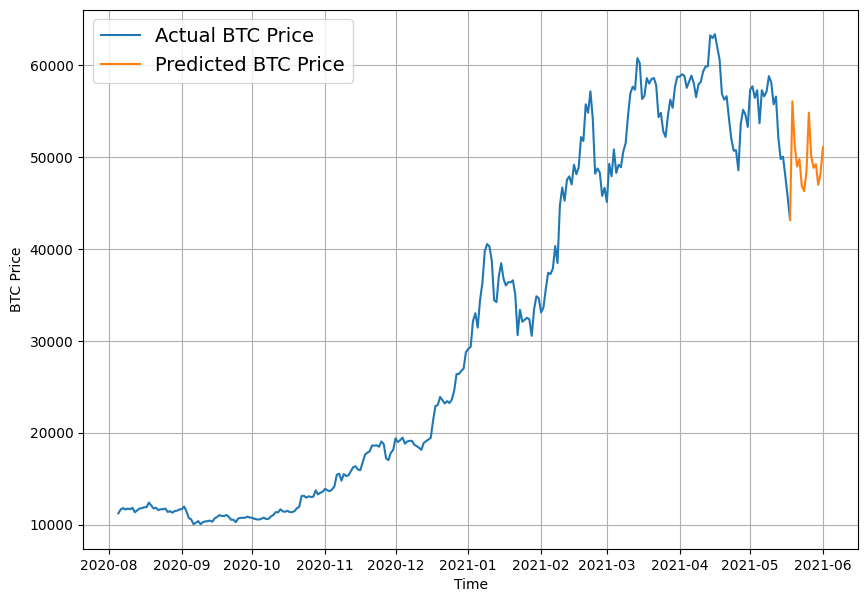

In [181]:
# Plot future prices predictions on Bitcoin
plt.figure(figsize = (10,7))
plot_time_series(bitcoin_prices.index, btc_price, start = 2500, format = "-", label = "Actual BTC Price")
plot_time_series(next_time_steps, future_forecasts, format = "-", label = "Predicted BTC Price")

## Model 10: Why forecasting is BS (the turkey model)

In [187]:
# Introducing turkey problem to the BTC data (price of BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1]/100

In [188]:
# Manufacture an extra price on the end (to showcase the turkey problem)
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [186]:
# Get timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

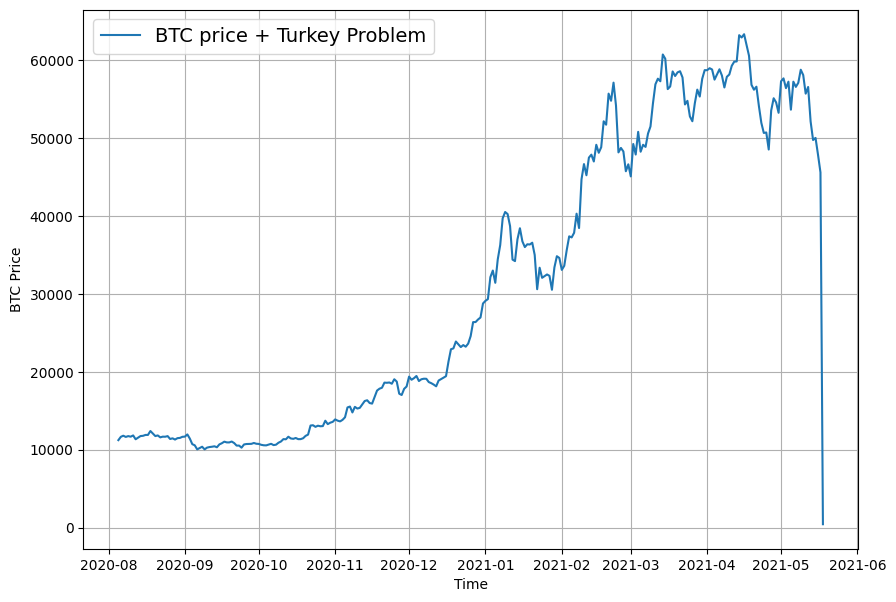

In [189]:
plt.figure(figsize = (10,7))
plot_time_series(timesteps = btc_timesteps_turkey,
                 values = btc_price_turkey,
                 format = "-",
                 label = "BTC price + Turkey Problem",
                 start = 2500)

In [191]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size = WINDOW_SIZE, horizon = HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [192]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1153 (4.50 KB)
Trainable params: 1153 (4.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Build a turkey model (model to predict on turkey data)

In [204]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "model_10_turkey_model"
turkey_model.compile(loss = "mae",
                     optimizer = tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs = 100,
                 verbose = 0,
                 batch_size = 128,
                 validation_data = (X_test, y_test),
                 callbacks = [create_model_checkpoint(model_name = turkey_model.name)])

In [205]:
# Evalaute
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 787.2269


787.2269287109375

In [207]:
# Load best performing turkey model and evaluate on test data
turkey_model = tf.keras.models.load_model("/content/model_experiments/model_10_turkey_model")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 4ms/step - loss: 641.6854


641.6853637695312

In [208]:
# Make predictions
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8862.744, 8803.242, 9031.181, 8772.723, 8768.493, 8746.688,
       8668.868, 8563.023, 8456.923, 8537.049], dtype=float32)>

In [209]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true = y_test,
                                y_pred = turkey_preds)
turkey_results

{'mae': 17149.496,
 'mse': 615850600.0,
 'rmse': 23752.523,
 'mape': 121.63953,
 'mase': 26.5389}

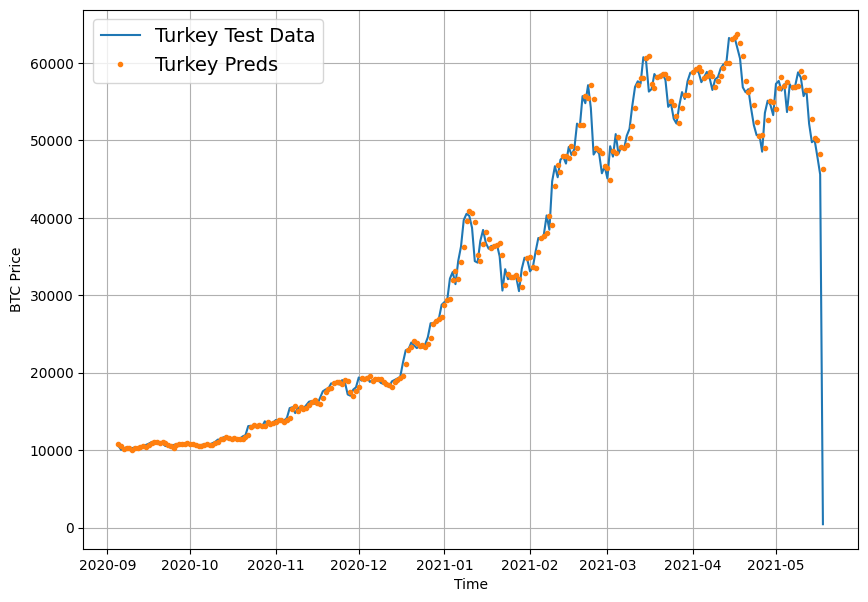

In [214]:
plt.figure(figsize = (10,7))
offset = 300
plot_time_series(timesteps = btc_timesteps_turkey[-len(X_test):],
                 values = btc_price_turkey[-len(y_test):],
                 format = "-",
                 label = "Turkey Test Data",
                 start = offset)

plot_time_series(timesteps = btc_timesteps_turkey[-len(X_test):],
                 values = turkey_preds,
                 label = "Turkey Preds",
                 start = offset)

### Compare models

In [219]:
# Compare different model results (w = window, h = horizon)
model_results = pd.DataFrame({
    "naive_model": naive_results,
    "model_1_dense_w7_h1": model_1_results,
    "model_2_dense_w30_h1": model_2_results,
    "model_3_dense_w30_h7": model_3_results,
    "model_4_CONV1D": model_4_results,
    "model_5_LSTM": model_5_results,
    "model_6_multivariate": model_6_results,
    "model_7_NBEATS": model_7_results,
    "model_8_ensemble": ensemble_results,
    "model_10_turkey": turkey_results
}).T
model_results

,mae,mse,rmse,mape,mase
naive_model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,566.982605,1.153945e+06,1074.218262,2.548854,0.996031
model_2_dense_w30_h1,616.888123,1.313643e+06,1146.142578,2.758480,1.078326
model_3_dense_w30_h7,1237.351440,5.340579e+06,1417.105103,5.550852,2.201798
model_4_CONV1D,576.591125,1.206759e+06,1098.525635,2.583834,1.012911
model_5_LSTM,592.353699,1.254199e+06,1119.910156,2.662092,1.040601
model_6_multivariate,571.010986,1.176792e+06,1084.800293,2.562110,1.003108
model_7_NBEATS,580.317017,1.202825e+06,1096.733643,2.650679,1.019456
model_8_ensemble,567.639893,1.146487e+06,1070.741455,2.551898,0.997186
model_10_turkey,17149.496094,6.158506e+08,23752.523438,121.639526,26.538900


<Axes: >

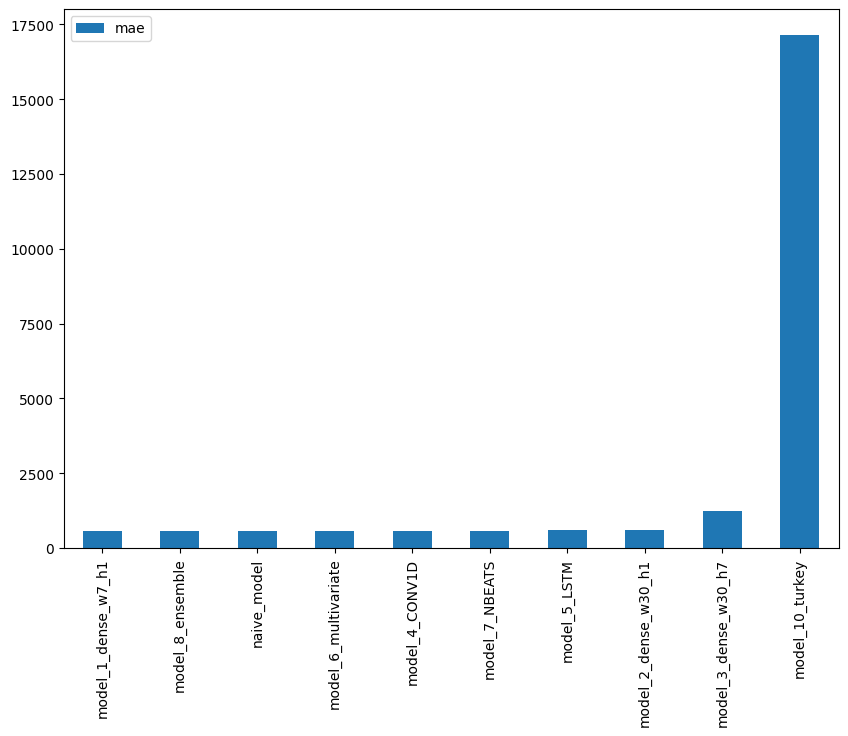

In [220]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by = "mae").plot(figsize = (10,7), kind = "bar")